# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn import set_config
set_config("figure")

import warnings
warnings.filterwarnings('ignore')


In [101]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [102]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
34035,37,admin.,divorced,university.degree,unknown,yes,no,cellular,may,wed,...,8,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no
28522,23,technician,single,professional.course,no,no,yes,cellular,apr,tue,...,4,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
1829,55,admin.,divorced,university.degree,no,yes,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
9776,39,admin.,married,university.degree,no,no,no,telephone,jun,mon,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
8863,50,blue-collar,married,basic.4y,no,yes,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
38926,55,management,married,university.degree,no,yes,no,cellular,nov,wed,...,1,999,1,failure,-3.4,92.649,-30.1,0.716,5017.5,no
8805,52,management,divorced,university.degree,no,yes,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
22427,34,technician,divorced,professional.course,no,yes,no,cellular,aug,fri,...,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
35662,37,admin.,divorced,university.degree,unknown,yes,no,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
34562,27,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.
The goal of this project is to compare the effectiveness of different ML classification techniques in predicting the outcome of multiple direct marketing campaigns performed by a Portuguese bank offering long term deposit applications to it's clients. 

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [104]:
#determine number of duplicates
num_duplicates = df.duplicated().sum()
print(f'There are {num_duplicates} duplicates in the dataset')

There are 12 duplicates in the dataset


In [105]:
#remove the duplicates
df.drop_duplicates(inplace = True)
num_duplicates = df.duplicated().sum()
print(f'There are {num_duplicates} duplicates in the dataset')


There are 0 duplicates in the dataset


In [106]:
for col in df.columns:
    #see if column has string value
    if df[col].dtype == 'object':
        unknown_percentage = ((df[col] == 'unknown') | ((df[col] == 'Unknown'))).mean() * 100
        print(f"{col}: {unknown_percentage:.2f}% unknown values")

job: 0.80% unknown values
marital: 0.19% unknown values
education: 4.20% unknown values
default: 20.88% unknown values
housing: 2.40% unknown values
loan: 2.40% unknown values
contact: 0.00% unknown values
month: 0.00% unknown values
day_of_week: 0.00% unknown values
poutcome: 0.00% unknown values
y: 0.00% unknown values


In [107]:
#Remove columns with 'unknown' values
for col in df.columns:
    if df[col].dtype == 'object':
        df = df[df[col] != 'unknown']
        df = df[df[col] != 'Unknown']

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [108]:
banking_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'y']
banking_df = df[banking_features]
banking_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,no


In [109]:
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30478 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          30478 non-null  int64 
 1   job          30478 non-null  object
 2   marital      30478 non-null  object
 3   education    30478 non-null  object
 4   default      30478 non-null  object
 5   housing      30478 non-null  object
 6   loan         30478 non-null  object
 7   contact      30478 non-null  object
 8   month        30478 non-null  object
 9   day_of_week  30478 non-null  object
 10  duration     30478 non-null  int64 
 11  y            30478 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.0+ MB


In [110]:
#look at numerical features
banking_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,30478.0,39.03,10.33,17.0,31.0,37.0,45.0,95.0
duration,30478.0,259.51,261.75,0.0,103.0,181.0,321.0,4918.0


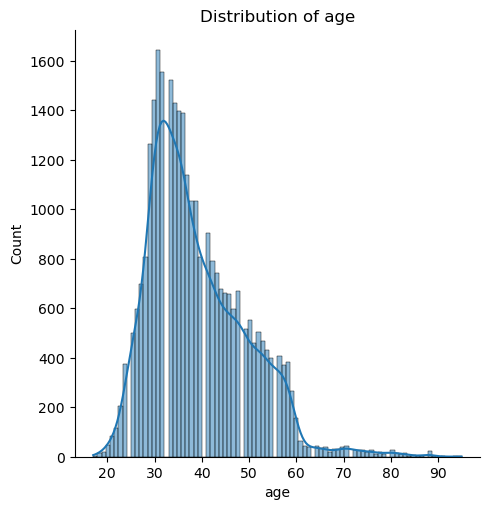

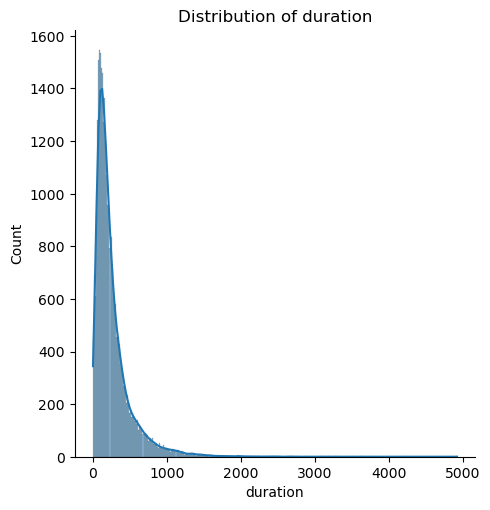

In [111]:
num_features = ['age', 'duration']
#use seaborn to create distribution plots for numerical features
for feature in num_features:
    sns.displot(banking_df[feature], kde = True)
    plt.title(f'Distribution of {feature}')
    plt.show()

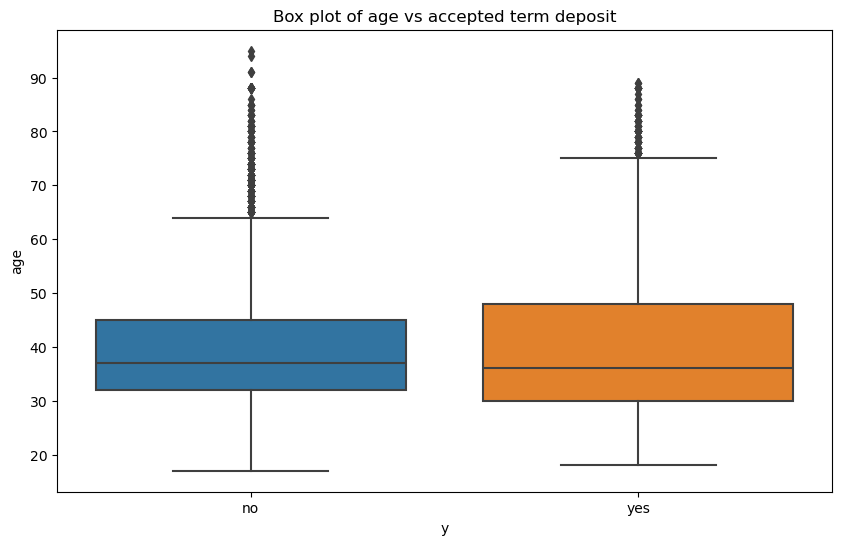

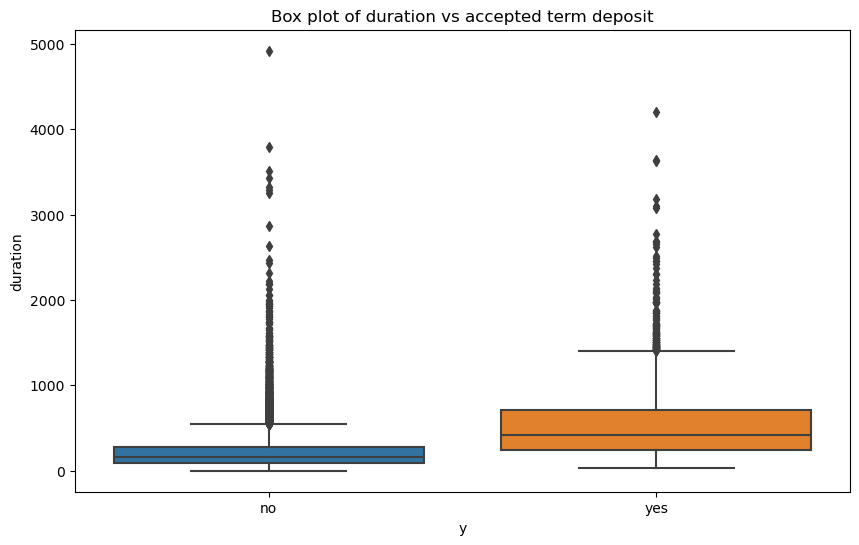

In [112]:
# Create box plots for numerical features vs 'y' output feature
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='y', y=feature, data=banking_df)
    plt.title(f'Box plot of {feature} vs accepted term deposit')
    plt.show()

<Axes: xlabel='age', ylabel='duration'>

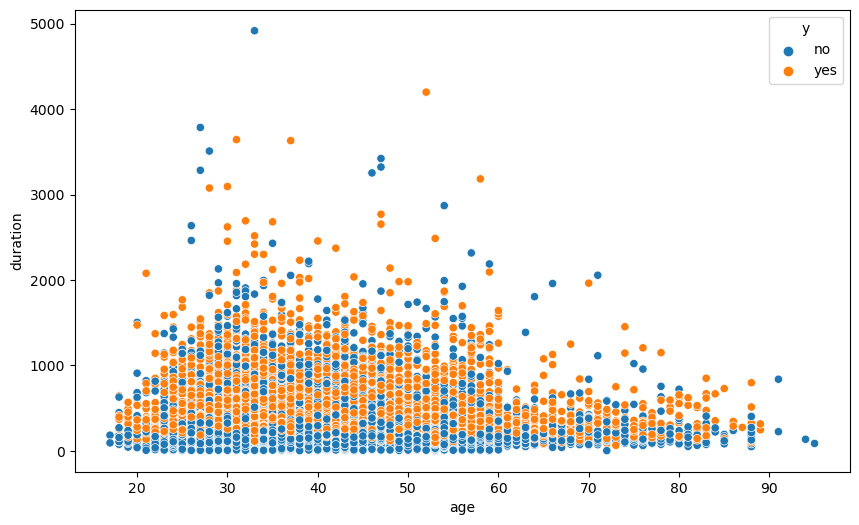

In [113]:
#use seaborn to create scatter plot of duration vs log(age) with hue as 'y'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='duration', hue='y', data=banking_df)


<Axes: >

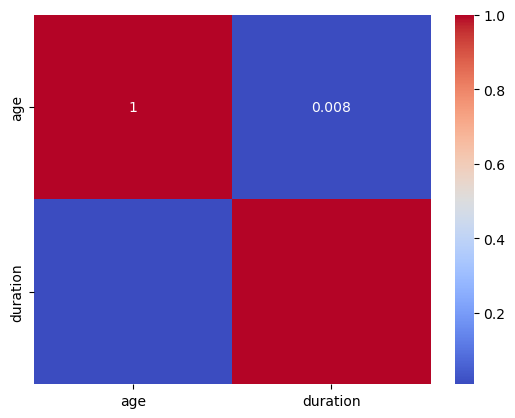

In [114]:
#measure correlation between numerical features
corr = banking_df[num_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [115]:
#Note: output variable y is unbalanced
success = banking_df['y'].value_counts()
success_percentage = success/len(banking_df) * 100  
success_df = pd.DataFrame({'success': success, 'percentage': success_percentage})
success_df


,success,percentage
y,,
no,26620,87.341689
yes,3858,12.658311


In [116]:
#examine the categorical features
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']

In [117]:
for feature in cat_features:
    print(f'Feature: {feature}')
    print(banking_df[feature].value_counts())
    print('\n')

Feature: job
job
admin.           8734
blue-collar      5674
technician       5469
services         2856
management       2311
retired          1215
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: count, dtype: int64


Feature: marital
marital
married     17487
single       9439
divorced     3552
Name: count, dtype: int64


Feature: education
education
university.degree      10408
high.school             7697
professional.course     4318
basic.9y                4276
basic.4y                2380
basic.6y                1388
illiterate                11
Name: count, dtype: int64


Feature: default
default
no     30475
yes        3
Name: count, dtype: int64


Feature: housing
housing
yes    16516
no     13962
Name: count, dtype: int64


Feature: loan
loan
no     25710
yes     4768
Name: count, dtype: int64


Feature: contact
contact
cellular     20435
telephone    10043
Name: count, dtype: int64


Feature: month
month
may

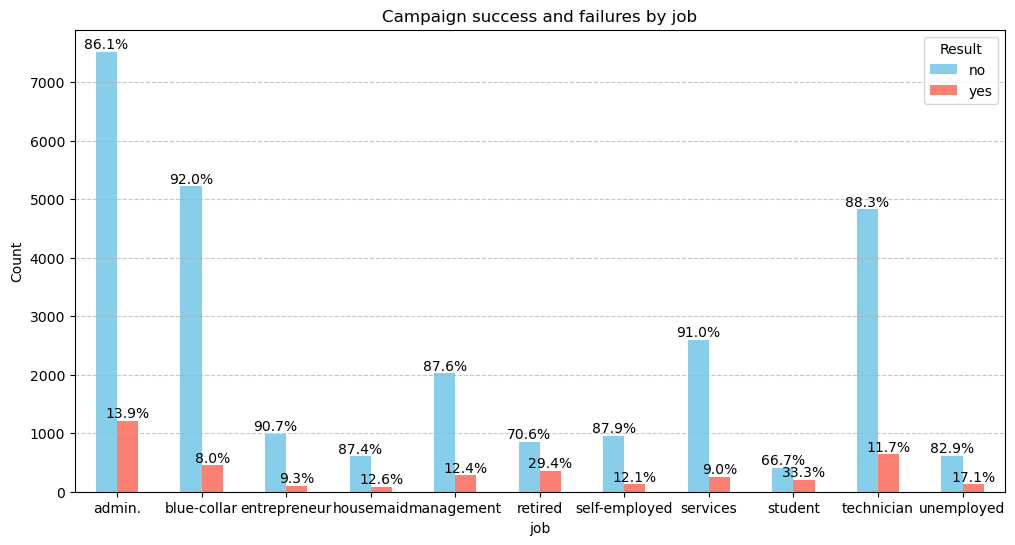

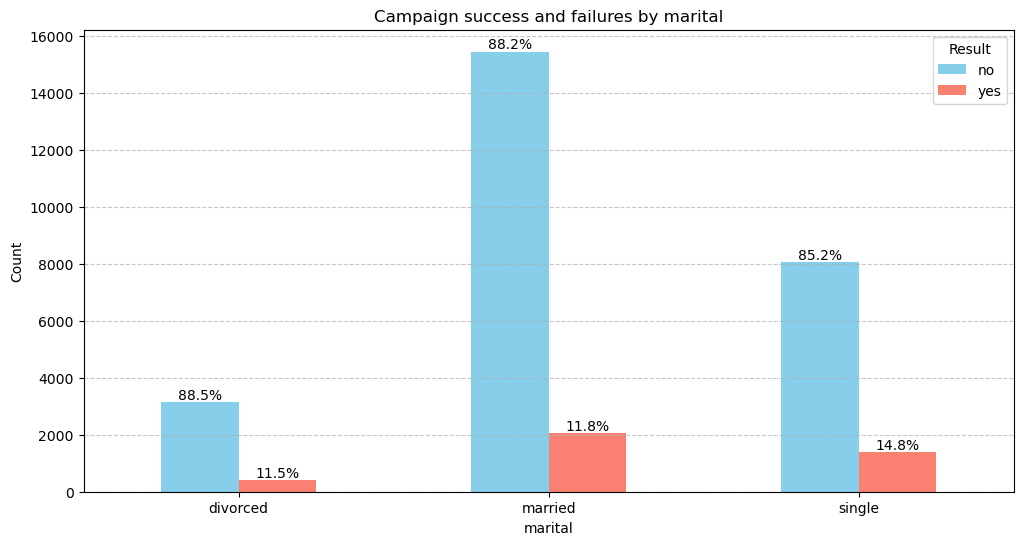

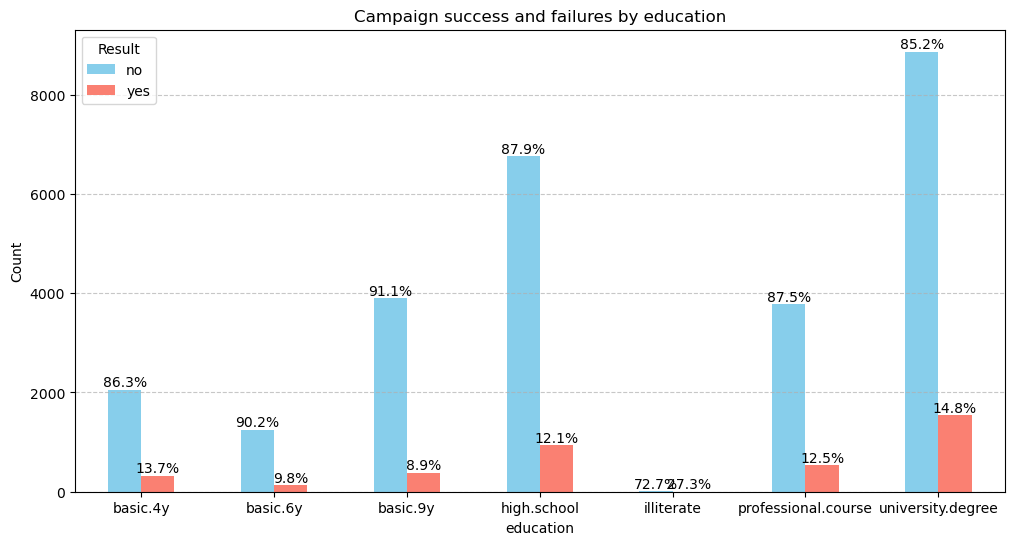

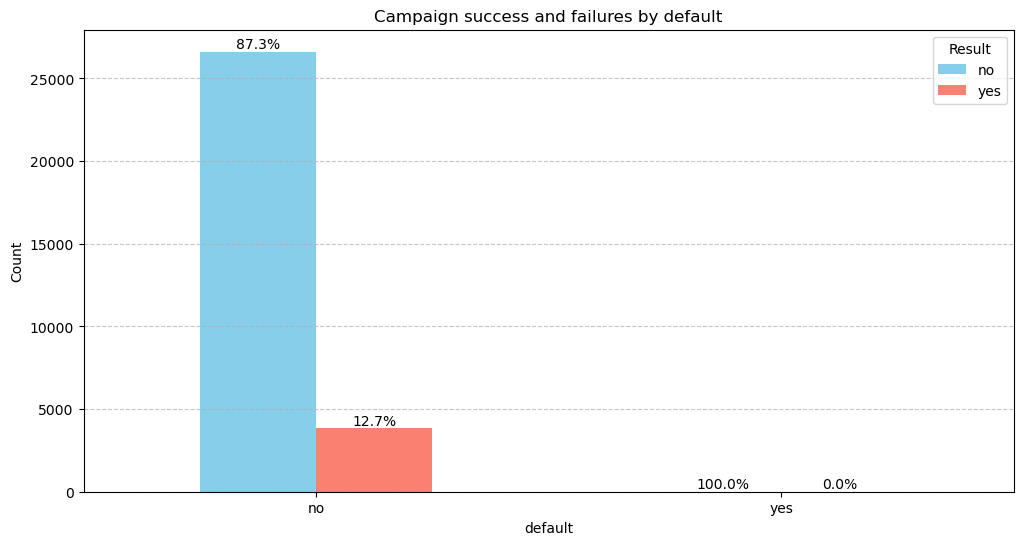

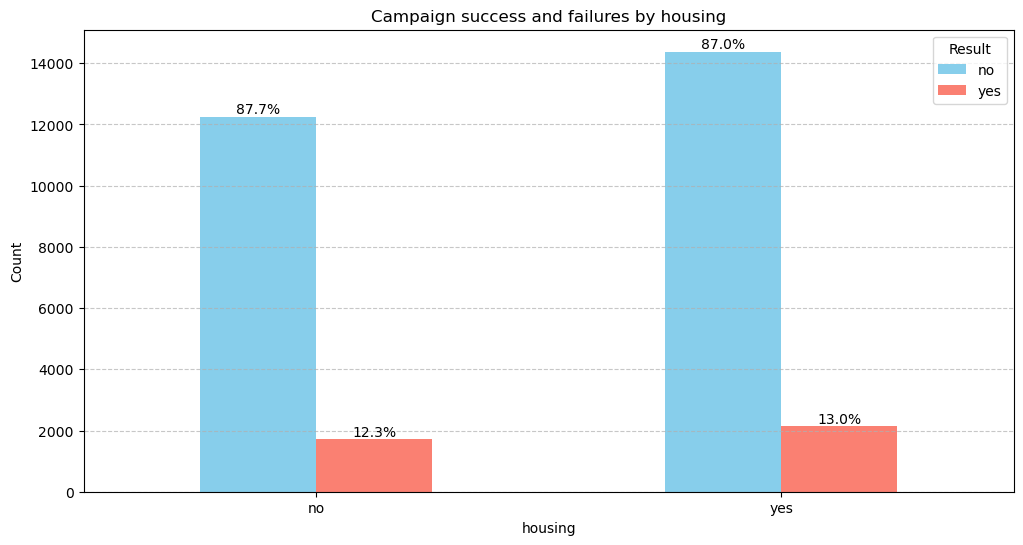

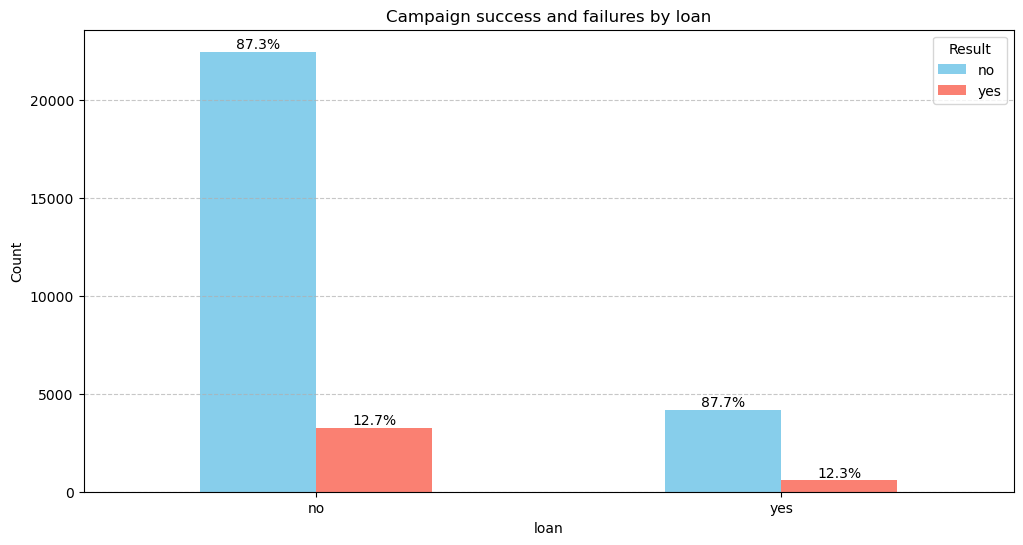

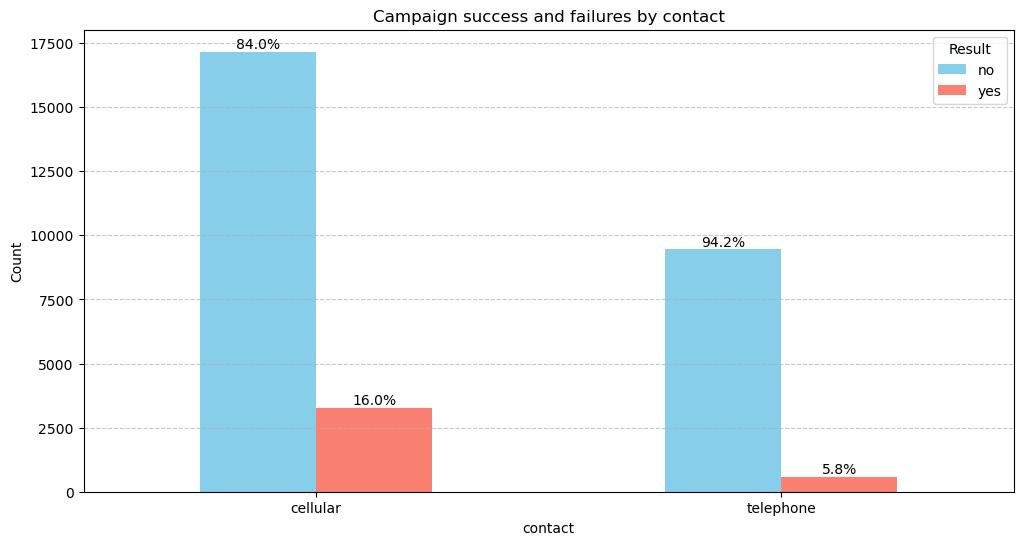

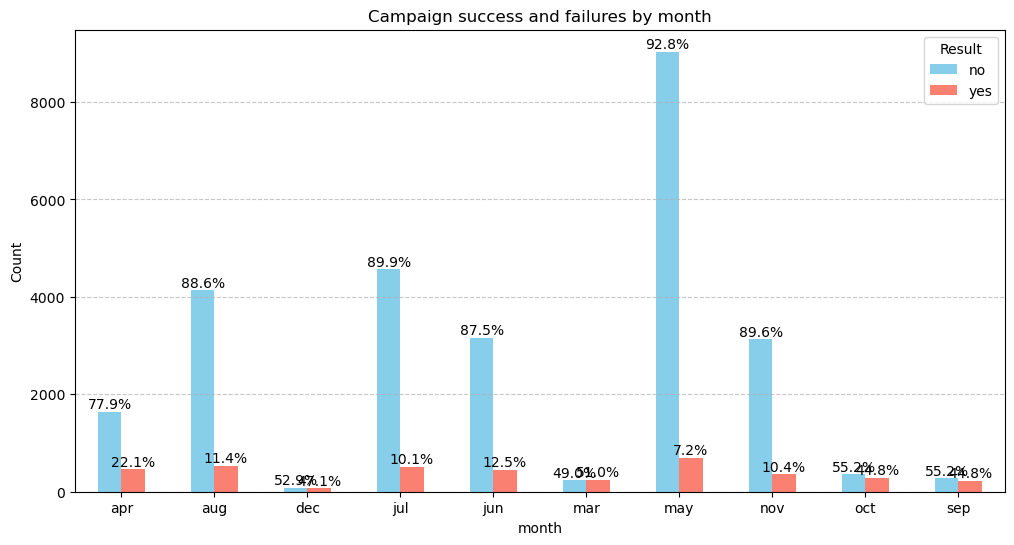

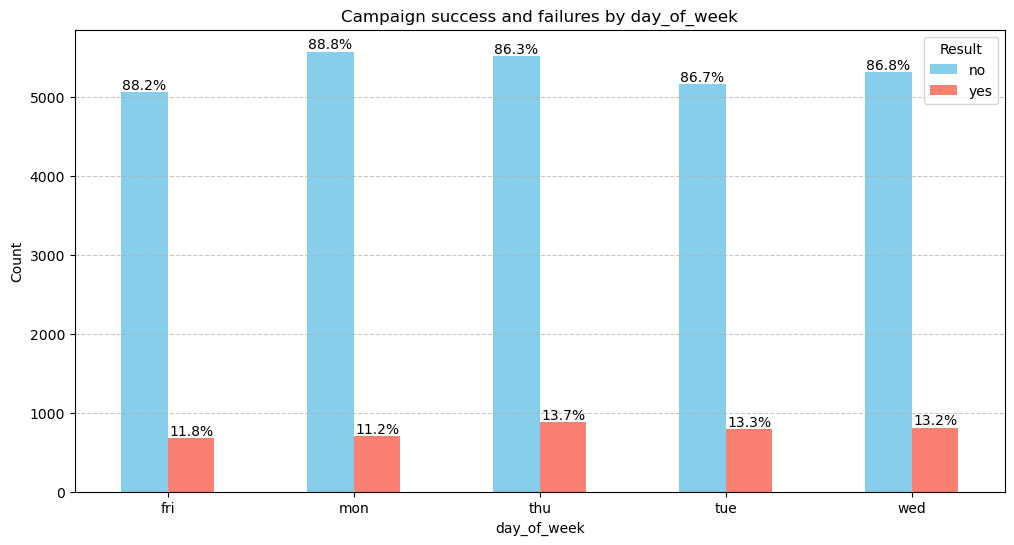

In [118]:
for feature in cat_features:
   #compare the connection success rate based on connection method
    feature_df = pd.crosstab(banking_df[feature], banking_df['y'])


    percentages = feature_df.div(feature_df.sum(axis=1), axis=0) * 100
    ax = feature_df.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
    plt.title(f'Campaign success and failures by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title='Result')

    # Annotate percentages on the bars
    for bar_group, percentage_group in zip(ax.containers, percentages.T.iterrows()):
        for bar, percentage in zip(bar_group, percentage_group[1]):
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X-coordinate
                bar.get_height() + 0.5,  # Y-coordinate
                f'{percentage:.1f}%',  # Percentage text
                ha='center', va='bottom', fontsize=10  # Align text
            )

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

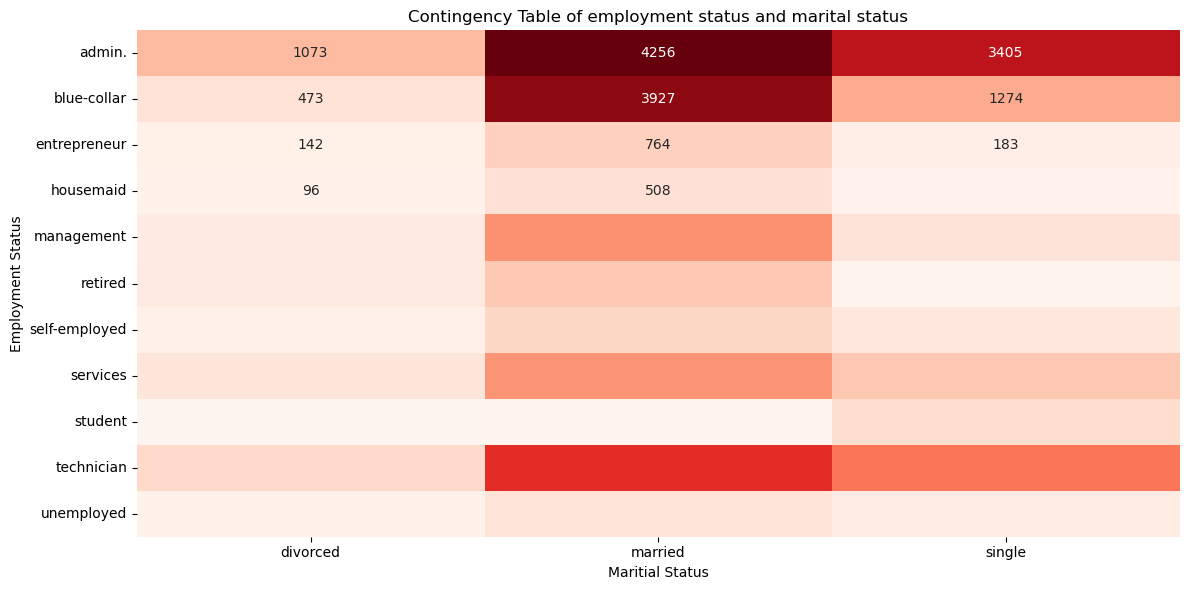

In [119]:
#contingency table showing the number of connections by year and make
contingency_table = pd.crosstab(banking_df['job'], banking_df['marital'])

# Plot the heatmap of the contingency table
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, cmap="Reds", fmt="d", cbar=False)

# Add labels and title
plt.xlabel('Maritial Status')
plt.ylabel('Employment Status')
plt.title('Contingency Table of employment status and marital status')

# Show the plot
plt.tight_layout()
plt.show()

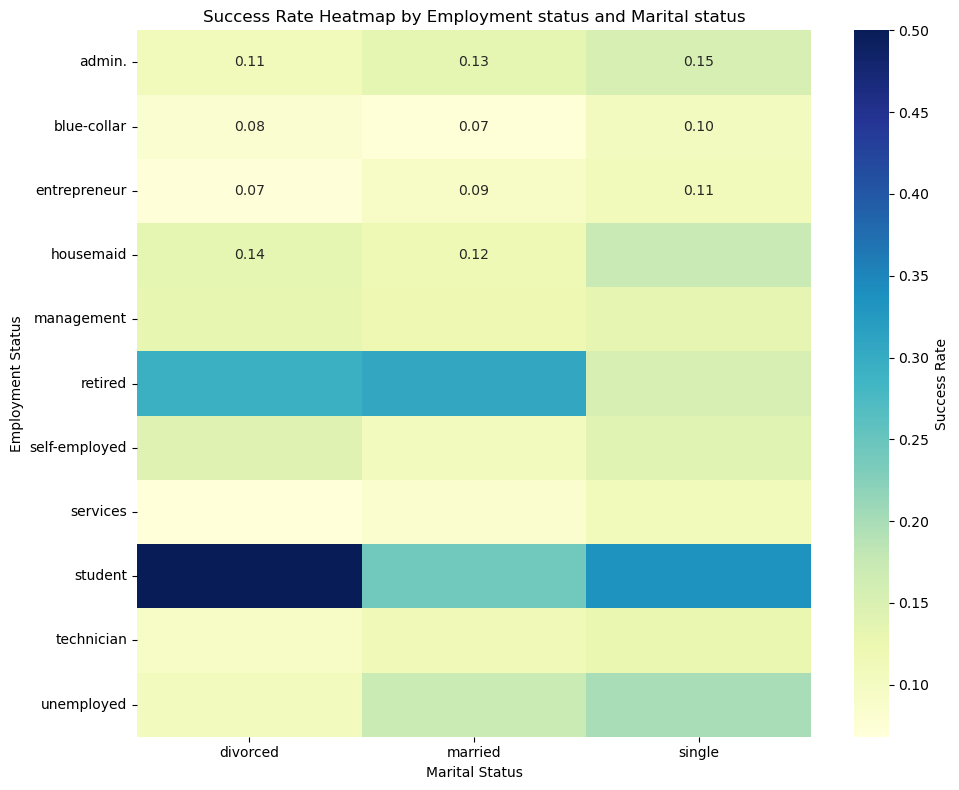

In [120]:
success_rate_table = banking_df[['job', 'marital', 'y']]
#map the 'y' column to 1 and 0
success_rate_table['y'] = success_rate_table['y'].map({'yes': 1, 'no': 0})
success_rate_table = success_rate_table.groupby(['job', 'marital'])['y'].mean().unstack()

# Display the resulting table
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(success_rate_table, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Success Rate'})

# Add labels and title
plt.title("Success Rate Heatmap by Employment status and Marital status")
plt.xlabel("Marital Status")
plt.ylabel("Employment Status")

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

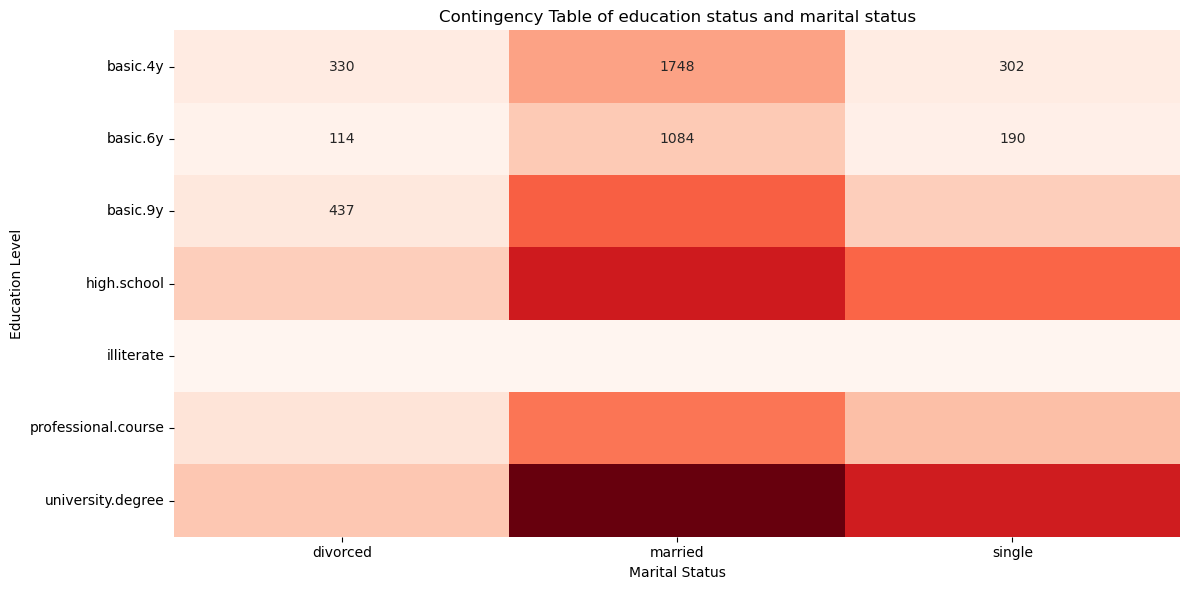

In [121]:
#contingency table showing the number of connections by year and make
contingency_table = pd.crosstab(banking_df['education'], banking_df['marital'])

# Plot the heatmap of the contingency table
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, cmap="Reds", fmt="d", cbar=False)

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Education Level')
plt.title('Contingency Table of education status and marital status')

# Show the plot
plt.tight_layout()
plt.show()

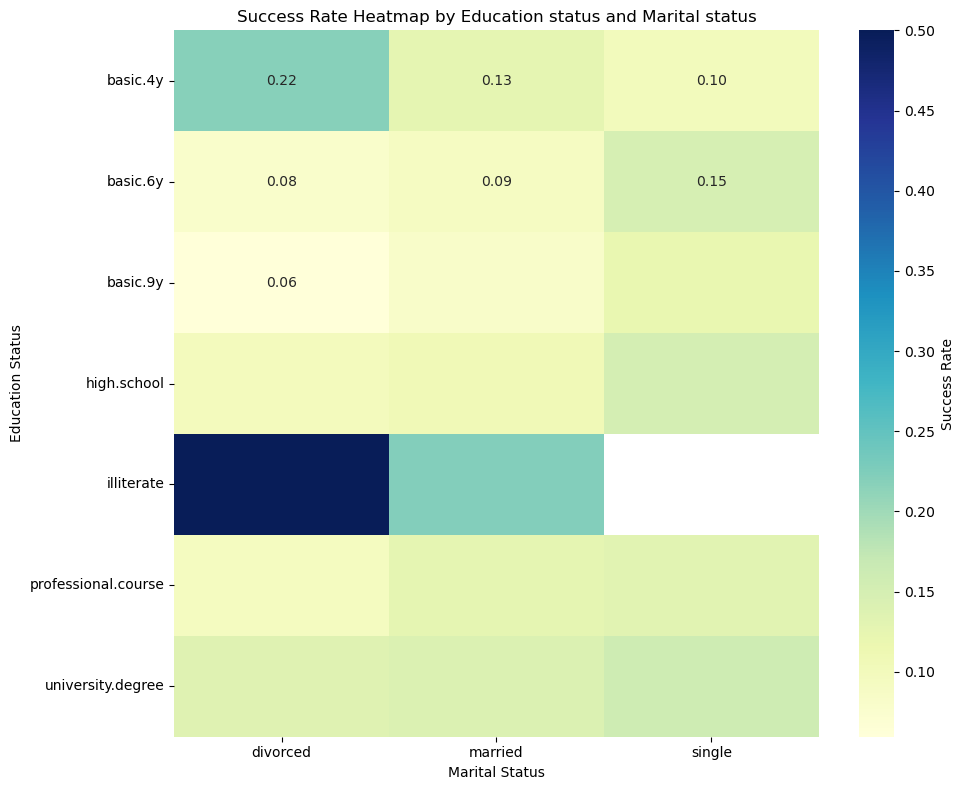

In [122]:
success_rate_table = banking_df[['education', 'marital', 'y']]
#map the 'y' column to 1 and 0
success_rate_table['y'] = success_rate_table['y'].map({'yes': 1, 'no': 0})
success_rate_table = success_rate_table.groupby(['education', 'marital'])['y'].mean().unstack()

# Display the resulting table
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(success_rate_table, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Success Rate'})

# Add labels and title
plt.title("Success Rate Heatmap by Education status and Marital status")
plt.xlabel("Marital Status")
plt.ylabel("Education Status")

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [123]:
#month is ordinal categorical feature map the month to numbers
banking_df['month'] = banking_df['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
#banking_df['day_of_week'] = banking_df['day_of_week'].map({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5})


In [124]:
#drop the 'default' and duration feature. As noted, duration is not known until after the call is made and default is not a good predictor.
#default is not a good predictor as it is highly imbalanced
columns_to_drop = ['duration', 'default', 'day_of_week']
banking_df.drop(columns = columns_to_drop, inplace = True)



In [125]:
mapping = {'yes': 1, 'no': 0}
banking_df['y'] = banking_df['y'].map(mapping)

In [126]:
banking_df.sample(10)

,age,job,marital,education,housing,loan,contact,month,y
24032,39,technician,married,professional.course,no,no,telephone,10,1
15362,29,management,single,basic.9y,yes,no,telephone,7,0
22082,43,admin.,married,university.degree,yes,no,cellular,8,0
8042,28,blue-collar,married,basic.9y,yes,yes,telephone,6,0
3740,46,admin.,divorced,university.degree,no,no,telephone,5,1
37791,51,admin.,divorced,high.school,yes,no,cellular,8,0
26386,57,technician,married,professional.course,yes,no,cellular,11,0
31674,36,blue-collar,married,basic.4y,no,no,cellular,5,0
27021,31,unemployed,single,basic.4y,yes,no,telephone,11,0
17654,58,admin.,divorced,university.degree,no,no,cellular,7,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [127]:
X_train, X_test, y_train, y_test = train_test_split(banking_df.drop(columns = 'y'), banking_df['y'], test_size = 0.2, random_state=42,
    stratify=banking_df['y'])

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [128]:
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)
dummy_train_accuracy = dummy_clf.score(X_train, y_train)
dummy_test_accuracy = dummy_clf.score(X_test, y_test)
dummy_y_pred = dummy_clf.predict(X_test)
dummy_precision = precision_score(y_test, dummy_y_pred, zero_division=1)  # Handles division by zero if necessary
dummy_recall = recall_score(y_test, dummy_y_pred, zero_division=1)
dummy_f1 = f1_score(y_test, dummy_y_pred, zero_division=1)

#create dictionary to store the results
dummy_results = {'Model': 'Dummy Classifier',
           'Train Accuracy': dummy_train_accuracy,
           'Test Accuracy': dummy_test_accuracy,
           'Precision': dummy_precision,
           'Recall': dummy_recall,
           'F1': dummy_f1}
print(dummy_results)

{'Model': 'Dummy Classifier', 'Train Accuracy': 0.8734312197522762, 'Test Accuracy': 0.8733595800524935, 'Precision': 1.0, 'Recall': 0.0, 'F1': 0.0}


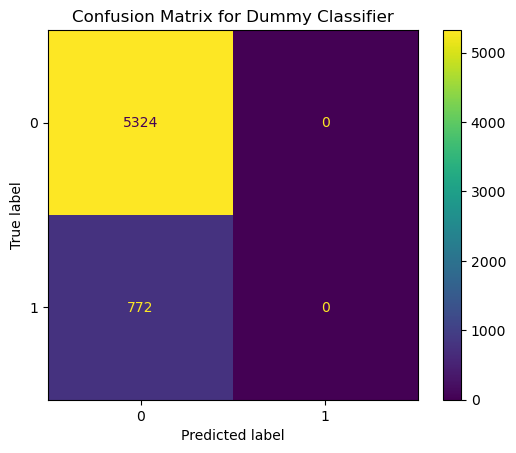

In [129]:
conf_matrix = confusion_matrix(y_test, dummy_y_pred)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot()
plt.title('Confusion Matrix for Dummy Classifier')
plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [130]:
lgr_selector = make_column_selector(dtype_include=object)
lgr_transformer = make_column_transformer((OneHotEncoder(drop = 'first'), lgr_selector),
                                     remainder = StandardScaler())
lgr_pipeline = Pipeline([('transformer', lgr_transformer),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])

lgr_time_start = time.time()
lgr_pipeline.fit(X_train, y_train)
lgr_train_time = time.time() - lgr_time_start
lgr_predictions = lgr_pipeline.predict(X_test)
lgr_train_accuracy = lgr_pipeline.score(X_train, y_train)
lgr_accuracy = lgr_pipeline.score(X_test, y_test)
lgr_f1 = f1_score(y_test, lgr_predictions)
lgr_precision = precision_score(y_test, lgr_predictions)
lgr_recall = recall_score(y_test, lgr_predictions)
lgr_results = {'Model': 'Logistic Regression', 'Train Time': lgr_train_time, 'Train Accuracy': lgr_train_accuracy,  'Test Accuracy': lgr_accuracy, 'Precision': lgr_precision, 'Recall': lgr_recall, 'F1': lgr_f1}
print(lgr_results)

{'Model': 'Logistic Regression', 'Train Time': 0.07128620147705078, 'Train Accuracy': 0.8734312197522762, 'Test Accuracy': 0.8733595800524935, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0}


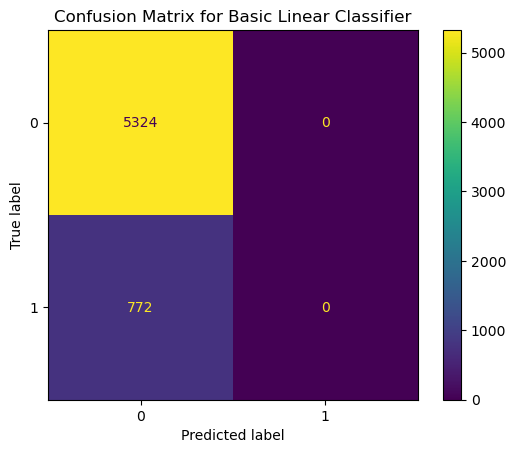

In [131]:
conf_matrix = confusion_matrix(y_test, lgr_predictions)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot()
plt.title('Confusion Matrix for Basic Linear Classifier')
plt.show()

### Problem 9: Score the Model

What is the accuracy of your model?

In [132]:
def score_model(pipeline, name, X_trn, y_trn, X_tst, y_tst):
    model_name = name #pipeline.steps[-1][0]  # Name of the last step in the pipeline
    start_time = time.time()
    pipeline.fit(X_trn, y_trn)
    train_time = time.time() - start_time
    y_pred_train = pipeline.predict(X_trn)
    y_pred_test = pipeline.predict(X_tst)
    accuracy = accuracy_score(y_tst, y_pred_test)
    accuracy_train = accuracy_score(y_trn, y_pred_train)
    precision = precision_score(y_test, y_pred_test, zero_division=1)  # Handles division by zero if necessary
    recall = recall_score(y_test, y_pred_test, zero_division=1)
    f1 = f1_score(y_test, y_pred_test, zero_division=1)
    pipeline_results = {'Model': model_name, 'Train Time': train_time, 'Train Accuracy': accuracy_train,  'Test Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}
    return pipeline_results

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [133]:

#knn_pipeline = make_pipeline(transformer, KNeighborsClassifier())
#start_time = time.time()
#knn_pipeline.fit(X_train, y_train)
#training_accuracy = knn_pipeline.score(X_train, y_train)
#test_accuracy = knn_pipeline.score(X_test, y_test)
#knn_predictions = knn_pipeline.predict(X_test)
#training_time = time.time() - start_time
#knn_recall = recall_score(y_test, knn_predictions)
#knn_precision = precision_score(y_test, knn_predictions)
#knn_f1 = f1_score(y_test, knn_predictions)
#base_knn_results = {'Model': 'Base KNN', 'Train Time': training_time, 'Train Accuracy': training_accuracy, 'Test Accuracy': test_accuracy, 'Precision': knn_precision, 'Recall': knn_recall, 'F1': knn_f1}
#base_knn_results

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [134]:
column_selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(drop = 'first'), column_selector),
                                     remainder = StandardScaler())
selector =  SelectKBest(mutual_info_classif, k=10)

lgr = make_pipeline(transformer, selector, LogisticRegression(random_state=42, max_iter=1000))
svc = make_pipeline(transformer, selector, SVC(random_state=42))
knn = make_pipeline(transformer, selector, KNeighborsClassifier())
dec_tree = make_pipeline(transformer, selector, DecisionTreeClassifier(random_state=42))
estimators = [lgr, svc, knn, dec_tree]
results = {}
for estimator in estimators:
    result = score_model(estimator, estimator.steps[-1][0], X_train, y_train, X_test, y_test)
    results[result['Model']] = result
results_df = pd.DataFrame(results).T
results_df.head()

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1
logisticregression,logisticregression,0.101939,0.873431,0.87336,1.0,0.0,0.0
svc,svc,13.785921,0.874703,0.872375,0.35,0.009067,0.017677
kneighborsclassifier,kneighborsclassifier,0.085981,0.886063,0.862533,0.404624,0.181347,0.250447
decisiontreeclassifier,decisiontreeclassifier,0.292244,0.908908,0.860072,0.397468,0.203368,0.269066


In [135]:
column_selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(drop = 'first'), column_selector),
                                     remainder = StandardScaler())
selector =  SelectKBest(mutual_info_classif, k=10)

In [136]:
# Decision Tree pipeline for GridSearchCV
dtree_pipeline = Pipeline([
    ('transformer', transformer),  # Standardize features
    ('selector', selector),
    ('dtree', DecisionTreeClassifier())
])

param_grid = {
    'dtree__criterion': ['gini', 'entropy'],  
    'dtree__max_depth': [None, 5, 10, 20], 
    'dtree__min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid = GridSearchCV(
    dtree_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

ex_result = score_model(grid, "dec_tree with GridSearchCV", X_train, y_train, X_test, y_test)
ex_result

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'Model': 'dec_tree with GridSearchCV',
 'Train Time': 9.48843264579773,
 'Train Accuracy': 0.9066114346649168,
 'Test Accuracy': 0.8589238845144357,
 'Precision': 0.3835978835978836,
 'Recall': 0.1878238341968912,
 'F1': 0.25217391304347825}

In [137]:
# Logistic Regression pipeline with GridSearchCV
lgr_pipeline = Pipeline([
    ('transformer', transformer),  # Standardize features
    ('selector', selector),
    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))
])

param_grid = {
    'lgr__C': [0.01, 0.1, 1, 10, 100],
    'lgr__penalty': ['l1', 'l2'],
    'lgr__solver': ['liblinear', 'saga']
}

grid = GridSearchCV(
    lgr_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

ex_result = score_model(grid, "lgr with GridSearchCV", X_train, y_train, X_test, y_test)
ex_result

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'Model': 'lgr with GridSearchCV',
 'Train Time': 9.64995551109314,
 'Train Accuracy': 0.8734312197522762,
 'Test Accuracy': 0.8733595800524935,
 'Precision': 1.0,
 'Recall': 0.0,
 'F1': 0.0}

In [138]:
#Use GridSearchCV to train hyperparameters for SVC - commented out due to excessive time to run
#svc_pipeline = Pipeline([
#    ('transformer', transformer),  # Standardize features
#    ('selector', selector),
#    ('svc', SVC(random_state=42))
#])

#param_grid = {
#    'svc__C': [0.1, 1, 10, 100],          
#    'svc__kernel': ['linear', 'poly', 'rbf'],     
#    'svc__gamma': ['scale', 'auto', 0.1, 0.01] 
#}

# Set up GridSearchCV 
#grid = GridSearchCV(
#    svc_pipeline,
#    param_grid=param_grid,
#    cv=5,
#    scoring='f1',
#    verbose=1,
#    n_jobs=-1
#)

#ex_result = score_model(grid, "SVC with GridSearchCV", X_train, y_train, X_test, y_test)
#ex_result

In [139]:
knn_pipe = Pipeline([('transform', transformer), ('selector', selector), ('knn', KNeighborsClassifier(n_neighbors = 10))])
knn_pipe

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E41A67AA90>)])),
                ('selector',
                 SelectKBest(score_func=<function mutual_info_classif at 0x000001E4136F8AE0>)),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [140]:
def scores_for_thresh(predict_probs, 
                  y_test, 
                  thresh):
    preds = np.where(predict_probs >= thresh, 1, 0)
    result = {
    'accuracy': accuracy_score(y_test, preds),  
    'precision': precision_score(y_test, preds),
    'recall': recall_score(y_test, preds),
    'f1': f1_score(y_test, preds)}
    return result


In [141]:
#Try KNN with different thresholds
thresholds = np.arange(0, 1, .1)
preds = knn_pipe.fit(X_train, y_train).predict(X_test)
test_predictions = knn_pipe.predict_proba(X_test)
test_predictions

array([[0.8, 0.2],
       [0.9, 0.1],
       [0.4, 0.6],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1]])

In [142]:
knn_results = {}
for i in thresholds:
    knn_results[i] = scores_for_thresh(test_predictions[:, 1], y_test, i)
knn_results_df = pd.DataFrame(knn_results).T
knn_results_df

,accuracy,precision,recall,f1
0.0,0.126640,0.126640,1.000000,0.224811
0.1,0.483432,0.168480,0.782383,0.277255
0.2,0.719324,0.244698,0.582902,0.344696
0.3,0.857776,0.414414,0.297927,0.346647
0.4,0.857776,0.414414,0.297927,0.346647
0.5,0.865814,0.439153,0.215026,0.288696
0.6,0.873852,0.521127,0.047927,0.087782
0.7,0.874180,0.647059,0.014249,0.027883
0.8,0.874180,0.647059,0.014249,0.027883
0.9,0.873524,1.000000,0.001295,0.002587


##### Questions